In [56]:
import pandas as pd 
from pyspark.sql import Row
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [57]:
df = spark.read.csv('PatientData_Definitive.csv', header = True, sep = ';')
df

DataFrame[ID: string, Observation_date: string, Full_name: string, Birth_date: string, Gender: string, Smoker: string, Drinker: string, Heart_disease: string, Steps_count: string, Sleep_hours: string, Stress_score: string]

In [58]:
rdd = df.rdd
print(rdd.collect())

[Row(ID='1', Observation_date='01/02/2022', Full_name='Zoella Pinksters', Birth_date='14/06/2002', Gender='Female', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='6876', Sleep_hours='8', Stress_score='59'), Row(ID='2', Observation_date='01/02/2022', Full_name='Rick Baster', Birth_date='26/01/1999', Gender='Male', Smoker='TRUE', Drinker='FALSE', Heart_disease='TRUE', Steps_count='4148', Sleep_hours='4', Stress_score='60'), Row(ID='3', Observation_date='01/02/2022', Full_name='Roger Novak', Birth_date='23/02/2000', Gender='Male', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='4851', Sleep_hours='10', Stress_score='14'), Row(ID='4', Observation_date='01/02/2022', Full_name='Ronald Johnson', Birth_date='14/08/1985', Gender='Male', Smoker='FALSE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='4066', Sleep_hours='10', Stress_score='1'), Row(ID='5', Observation_date='01/02/2022', Full_name='Susan Mccan', Birth_date='31/07/1980', Gender='Female', Smok

In [59]:
print(rdd.count())

270


In [60]:
#Apply map() transformation to count users' total steps
total_steps = rdd.map(lambda x: ([x[2],x[8]]))
data = total_steps.collect()
for f in data:
    print("Key:"+ str(f[0]) +", Value:"+f[1])

Key:Zoella Pinksters, Value:6876
Key:Rick Baster, Value:4148
Key:Roger Novak, Value:4851
Key:Ronald Johnson, Value:4066
Key:Susan Mccan, Value:6329
Key:Lucy Hale, Value:10743
Key:Melinda King, Value:11421
Key:Marlene Smith, Value:5051
Key:David Turner, Value:4329
Key:Taylor Long, Value:1518
Key:Zoella Pinksters, Value:6499
Key:Rick Baster, Value:1704
Key:Roger Novak, Value:2883
Key:Ronald Johnson, Value:7671
Key:Susan Mccan, Value:3747
Key:Lucy Hale, Value:11895
Key:Melinda King, Value:6190
Key:Marlene Smith, Value:4646
Key:David Turner, Value:8341
Key:Taylor Long, Value:12393
Key:Zoella Pinksters, Value:9888
Key:Rick Baster, Value:8591
Key:Roger Novak, Value:14991
Key:Ronald Johnson, Value:2631
Key:Susan Mccan, Value:5036
Key:Lucy Hale, Value:9657
Key:Melinda King, Value:14934
Key:Marlene Smith, Value:8206
Key:David Turner, Value:5177
Key:Taylor Long, Value:7904
Key:Zoella Pinksters, Value:1217
Key:Rick Baster, Value:4565
Key:Roger Novak, Value:6959
Key:Ronald Johnson, Value:7073
Key:

In [61]:
## Retrieve users with heart diseases
patients = rdd.filter(lambda x : 'TRUE' in x[7])

In [115]:
patients.collect()
patients.count()

216

In [129]:
# Task1: Categorize users based on step counts
super_users = rdd.filter(lambda x: int(x[8]) > 12000)
fair_users = rdd.filter(lambda x: 12000 > int(x[8]) > 7500)
light_users = rdd.filter(lambda x: int(x[8]) < 7500)
super_patients = super_users.intersection(patients)
fair_patients= fair_users.intersection(patients)
light_patients = light_users.intersection(patients)

In [130]:
print(super_patients.count())
print(fair_patients.count())
print(light_patients.count())

43
77
96


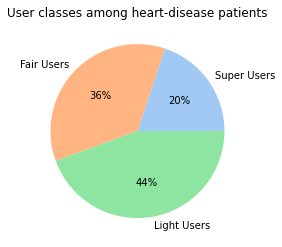

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

#define data
data = [43, 77, 96]
labels = ['Super Users', 'Fair Users', 'Light Users']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('User classes among heart-disease patients')
plt.show()

In [111]:
# Task2: Patients who are smokers and drinkers
smokers = patients.filter(lambda x : 'TRUE' in x[5])
drinkers = patients.filter(lambda x : 'TRUE' in x[6])
stress_above50 = patients.filter(lambda x : int(x[10]) > 50)
smokers_and_drinkers_stress_above50 = smokers.intersection(drinkers).intersection(stress_above50)

In [112]:
print(smokers_and_drinkers_stress_above50.collect())
print(smokers_and_drinkers_stress_above50.count())

[Row(ID='1', Observation_date='01/02/2022', Full_name='Zoella Pinksters', Birth_date='14/06/2002', Gender='Female', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='6876', Sleep_hours='8', Stress_score='59'), Row(ID='18', Observation_date='02/02/2022', Full_name='Marlene Smith', Birth_date='07/06/1964', Gender='Female', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='4646', Sleep_hours='5', Stress_score='57'), Row(ID='33', Observation_date='04/02/2022', Full_name='Roger Novak', Birth_date='23/02/2000', Gender='Male', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='6959', Sleep_hours='5', Stress_score='77'), Row(ID='71', Observation_date='08/02/2022', Full_name='Zoella Pinksters', Birth_date='14/06/2002', Gender='Female', Smoker='TRUE', Drinker='TRUE', Heart_disease='TRUE', Steps_count='13437', Sleep_hours='4', Stress_score='97'), Row(ID='78', Observation_date='08/02/2022', Full_name='Marlene Smith', Birth_date='07/06/1964', Gender='M

61


In [114]:
non_smokers = patients.filter(lambda x : 'FALSE' in x[5])
non_drinkers = patients.filter(lambda x : 'FALSE' in x[6])
stress_above50 = patients.filter(lambda x : int(x[10]) > 50)
non_smokers_and_drinkers_stress_above50 = non_smokers.intersection(non_drinkers).intersection(stress_above50)
print(non_smokers_and_drinkers_stress_above50.collect())
print(non_smokers_and_drinkers_stress_above50.count())

[Row(ID='26', Observation_date='03/02/2022', Full_name='Lucy Hale', Birth_date='13/12/1952', Gender='Female', Smoker='FALSE', Drinker='FALSE', Heart_disease='TRUE', Steps_count='9657', Sleep_hours='11', Stress_score='53'), Row(ID='16', Observation_date='02/02/2022', Full_name='Lucy Hale', Birth_date='13/12/1952', Gender='Female', Smoker='FALSE', Drinker='FALSE', Heart_disease='TRUE', Steps_count='11895', Sleep_hours='11', Stress_score='73'), Row(ID='36', Observation_date='04/02/2022', Full_name='Lucy Hale', Birth_date='13/12/1952', Gender='Female', Smoker='FALSE', Drinker='FALSE', Heart_disease='TRUE', Steps_count='10615', Sleep_hours='2', Stress_score='78'), Row(ID='46', Observation_date='05/02/2022', Full_name='Lucy Hale', Birth_date='13/12/1952', Gender='Female', Smoker='FALSE', Drinker='FALSE', Heart_disease='TRUE', Steps_count='10244', Sleep_hours='11', Stress_score='99'), Row(ID='106', Observation_date='11/02/2022', Full_name='Lucy Hale', Birth_date='13/12/1952', Gender='Female',

In [97]:
# Task3: Average stress score among the patients
stressed = patients.filter(lambda x : 'TRUE' in x[10])
stressed_patients = stressed.intersection(patients)

In [116]:
patients.collect()
patients.count()

216

In [102]:
user_stress= patients.map(lambda x: (x[2], int(x[10])))
user_stress.collect()

[('Zoella Pinksters', 59),
 ('Rick Baster', 60),
 ('Roger Novak', 14),
 ('Ronald Johnson', 1),
 ('Susan Mccan', 51),
 ('Lucy Hale', 26),
 ('Marlene Smith', 85),
 ('Taylor Long', 39),
 ('Zoella Pinksters', 33),
 ('Rick Baster', 39),
 ('Roger Novak', 47),
 ('Ronald Johnson', 65),
 ('Susan Mccan', 9),
 ('Lucy Hale', 73),
 ('Marlene Smith', 57),
 ('Taylor Long', 87),
 ('Zoella Pinksters', 66),
 ('Rick Baster', 56),
 ('Roger Novak', 36),
 ('Ronald Johnson', 30),
 ('Susan Mccan', 89),
 ('Lucy Hale', 53),
 ('Marlene Smith', 4),
 ('Taylor Long', 40),
 ('Zoella Pinksters', 72),
 ('Rick Baster', 80),
 ('Roger Novak', 77),
 ('Ronald Johnson', 65),
 ('Susan Mccan', 37),
 ('Lucy Hale', 78),
 ('Marlene Smith', 9),
 ('Taylor Long', 14),
 ('Zoella Pinksters', 95),
 ('Rick Baster', 65),
 ('Roger Novak', 72),
 ('Ronald Johnson', 78),
 ('Susan Mccan', 14),
 ('Lucy Hale', 99),
 ('Marlene Smith', 35),
 ('Taylor Long', 24),
 ('Zoella Pinksters', 8),
 ('Rick Baster', 11),
 ('Roger Novak', 83),
 ('Ronald John

In [103]:
avg_stress = user_stress.mapValues(lambda v: (v, 1)) \
    .reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1])) \
    .mapValues(lambda v: v[0] / v[1])

In [104]:
avg_stress.collect()

[('Zoella Pinksters', 56.629629629629626),
 ('Rick Baster', 49.22222222222222),
 ('Roger Novak', 50.370370370370374),
 ('Ronald Johnson', 52.888888888888886),
 ('Susan Mccan', 49.370370370370374),
 ('Lucy Hale', 49.148148148148145),
 ('Marlene Smith', 56.851851851851855),
 ('Taylor Long', 49.333333333333336)]